Importing important modules for web scraping

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

Web scraping for customer reviews

In [ ]:
import requests
from bs4 import BeautifulSoup

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# Iterate over pages
for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    # Iterate over reviews on the page
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        review_text = para.get_text()

        # Initialize ratings_dict for the current review
        ratings_dict = {}

        # Extract star ratings if available
        review_stats = para.find_next("div", {"class": "review-stats"})
        if review_stats:
            ratings_table = review_stats.find("table", {"class": "review-ratings"})
            if ratings_table:
                for tr in ratings_table.find_all("tr"):
                    category = tr.find("td", {"class": "review-rating-header"})
                    stars_span = tr.find("td", {"class": "review-rating-stars stars"})
                    if category and stars_span:
                        category_text = category.text.strip()
                        stars = len(stars_span.find_all("span", {"class": "star fill"}))
                        ratings_dict[category_text] = stars

            # Extract Recommended information
            recommended_td = review_stats.find("td", {"class": ["review-value rating-no", "review-value rating-yes"]})
            recommended_text = recommended_td.text.strip() if recommended_td else None

        # Add the review and ratings to the list
        reviews.append({"Review": review_text, **ratings_dict, "Recommended": recommended_text})

    print(f"   ---> {len(reviews)} total reviews")


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


Now we will make a dataframe from our scrapes.

In [ ]:
import pandas as pd

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(reviews)


df.head()

,Review,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity
0,✅ Trip Verified | For the price paid (bought ...,1.0,4.0,5.0,1.0,2.0,4,yes,NaN
1,✅ Trip Verified | Flight left on time and arr...,3.0,2.0,1.0,1.0,5.0,2,no,NaN
2,✅ Trip Verified | Very Poor Business class pr...,1.0,5.0,2.0,2.0,1.0,2,no,2.0
3,Not Verified | This review is for LHR-SYD-LHR....,5.0,3.0,1.0,3.0,3.0,3,no,NaN
4,✅ Trip Verified | Absolutely pathetic business...,1.0,2.0,4.0,1.0,3.0,1,no,1.0


In [ ]:
# Save the data to a CSV file (optional)
df.to_csv('/content/cleaned_reviews_with_ratings_and_info.csv')

In [ ]:
df.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Wifi & Connectivity
count,914.000000,907.000000,791.000000,531.000000,944.000000,1000.000000,294.000000
mean,2.765864,3.186329,2.680152,2.817326,2.603814,2.407000,2.214286
std,1.387590,1.522281,1.482419,1.472567,1.550092,1.490494,1.527339
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,2.500000,2.000000,1.000000
75%,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


The above method returns description of the data in the dataset.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Review                  1000 non-null   object 
 1   Seat Comfort            914 non-null    float64
 2   Cabin Staff Service     907 non-null    float64
 3   Food & Beverages        791 non-null    float64
 4   Inflight Entertainment  531 non-null    float64
 5   Ground Service          944 non-null    float64
 6   Value For Money         1000 non-null   int64  
 7   Recommended             1000 non-null   object 
 8   Wifi & Connectivity     294 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 70.4+ KB


In [ ]:
df.columns

Index(['Review', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Inflight Entertainment', 'Ground Service', 'Value For Money',
       'Recommended', 'Wifi & Connectivity'],
      dtype='object')


There are three data types used:
1. object - Column contains categorical values
2. float64 - Column contains decimal numbers
3. int64 - Column contains integer values

Following are the details of columns of the dataset:

* 'Review' contains specific reviews of each customer.
* 'Recommended' has 2 unique objects 'yes' or 'no' which tells if the customer
   recommends the company or not.
* Rest of the columns are showing ratings ranging from 1 to 5 stars.



The data is raw and needs to be cleaned. We will use RegEx(re) library in python to clean the reviews and then we will convert the objects in recommended to integers.

In [ ]:
import re

def clean_review(text):
    # Find the index of "|" in the text
    pipe_index = text.find("|")

    # If "|" is found, remove the substring before "|", including "|"
    if pipe_index != -1:
        text = text[pipe_index + 1:]

    # Remove symbols and unwanted characters
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Convert to lowercase
    text = text.lower()

    return text

# Convert "Recommended" column to 1 and 0
df['Recommended'] = df['Recommended'].map({'yes': 1, 'no': 0})

df['Review'] = df['Review'].apply(clean_review)


In [ ]:
df.head()

,Review,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity
0,for the price paid bought during a sale it w...,1.0,4.0,5.0,1.0,2.0,4,1,NaN
1,flight left on time and arrived over half an...,3.0,2.0,1.0,1.0,5.0,2,0,NaN
2,very poor business class product ba is not e...,1.0,5.0,2.0,2.0,1.0,2,0,2.0
3,this review is for lhrsydlhr ba and ba busine...,5.0,3.0,1.0,3.0,3.0,3,0,NaN
4,absolutely pathetic business class product ba...,1.0,2.0,4.0,1.0,3.0,1,0,1.0


In [ ]:
pip install nltk

We will be using SentimentIntensityAnalyzer to analyze the sentiment score of each review.



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


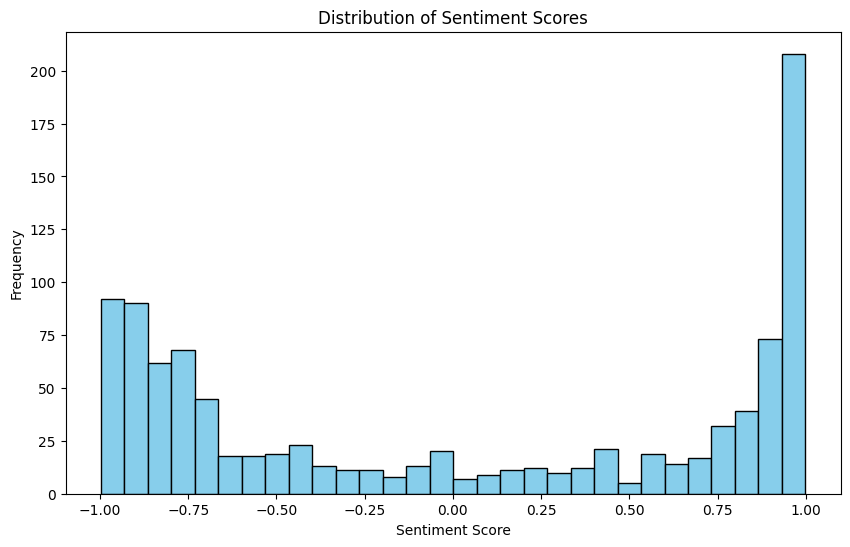

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download the NLTK VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Load the cleaned data

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores for a given text
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# Apply sentiment analysis to the 'Review' column
df['Sentiment'] = df['Review'].apply(get_sentiment_score)

# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 6))
df['Sentiment'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
df.loc[df['Sentiment'] > 0.8].count()

Review                    318
Seat Comfort              310
Cabin Staff Service       310
Food & Beverages          296
Inflight Entertainment    190
Ground Service            312
Value For Money           318
Recommended               318
Wifi & Connectivity        94
Sentiment                 318
dtype: int64

EDA on rest of the data

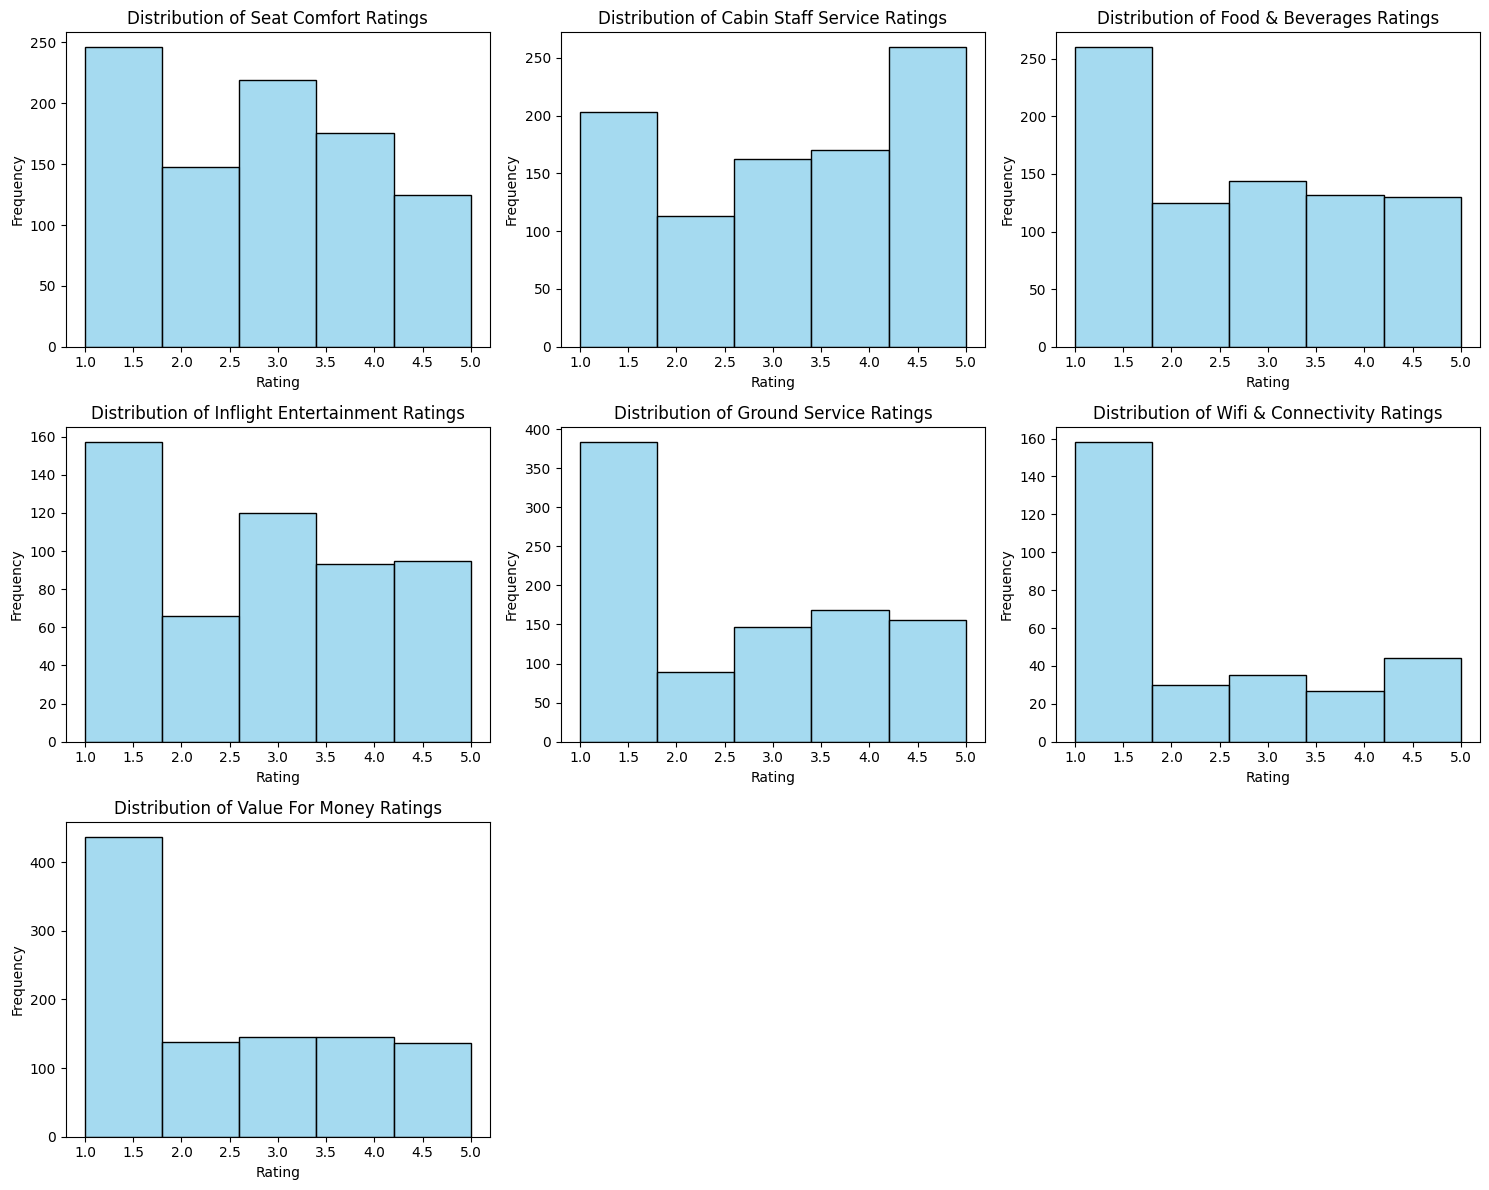

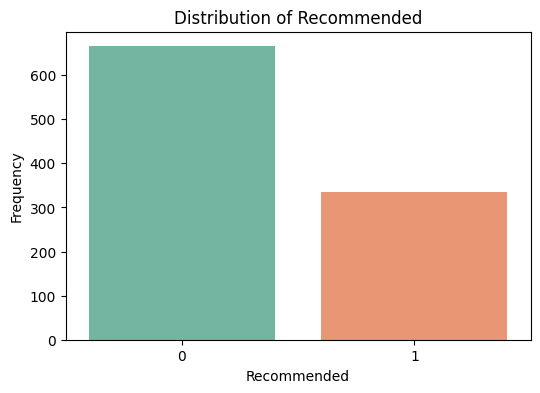

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data

# Visualize the distribution of ratings for different categories
categories = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
              'Inflight Entertainment', 'Ground Service', 'Wifi & Connectivity', 'Value For Money']

plt.figure(figsize=(15, 12))
for i, category in enumerate(categories, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=category, bins=5, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {category} Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Visualize the distribution of Recommended column
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Recommended', palette='Set2')
plt.title('Distribution of Recommended')
plt.xlabel('Recommended')
plt.ylabel('Frequency')
plt.show()


Below is the correlation analysis

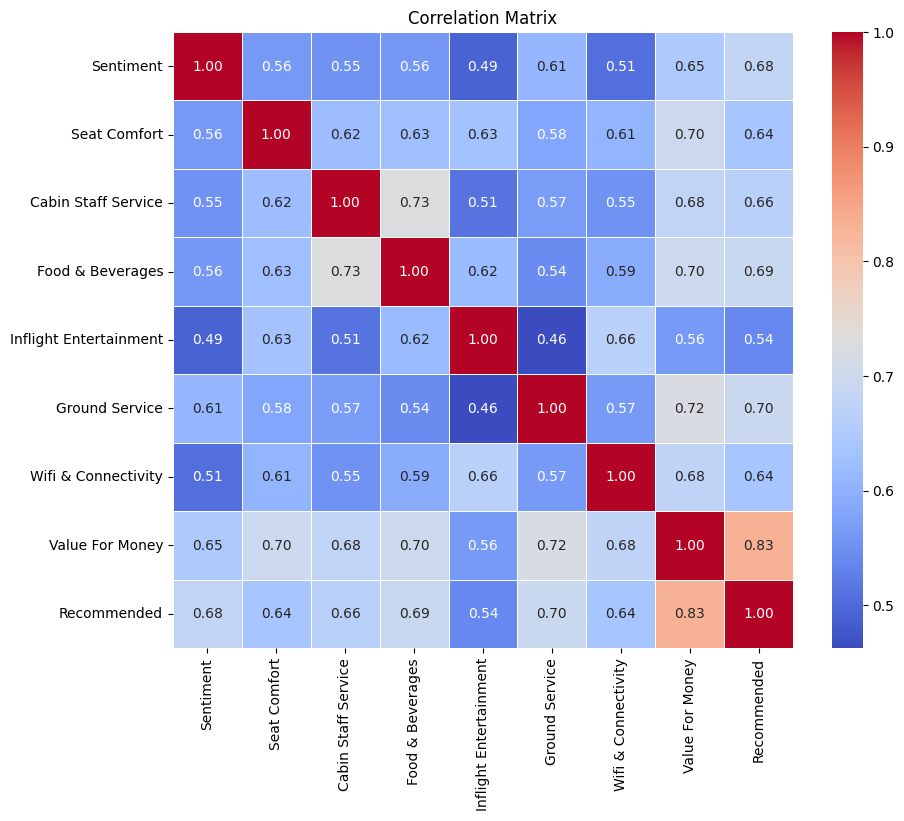

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned data

# Calculate correlation matrix
correlation_matrix = df[['Sentiment', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
                          'Inflight Entertainment', 'Ground Service', 'Wifi & Connectivity',
                          'Value For Money', 'Recommended']].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


# Hypothesis testing:

Hypothesis 1: Difference in Sentiment between Recommended and Not Recommended Reviews
Null Hypothesis (H0): There is no significant difference in sentiment scores between recommended and not recommended reviews.

Alternative Hypothesis (H1): There is a significant difference in sentiment scores between recommended and not recommended reviews.

We can use a t-test for independent samples to test this hypothesis.



In [ ]:
from scipy.stats import ttest_ind

# Separate data into recommended and not recommended
recommended_reviews = df[df['Recommended'] == 1]['Sentiment']
not_recommended_reviews = df[df['Recommended'] == 0]['Sentiment']

# Perform t-test
t_stat, p_value = ttest_ind(recommended_reviews, not_recommended_reviews)

# Display the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Determine significance level (alpha)
alpha = 0.05

# Check for statistical significance
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sentiment between recommended and not recommended reviews.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sentiment between recommended and not recommended reviews.")


T-statistic: 29.301263129760365
P-value: 1.119737842005004e-136
Reject the null hypothesis: There is a significant difference in sentiment between recommended and not recommended reviews.


Hypothesis 2: Correlation between Sentiment and Ratings
Null Hypothesis (H0): There is no significant correlation between sentiment scores and ratings.

Alternative Hypothesis (H1): There is a significant correlation between sentiment scores and ratings.

We can use Pearson correlation for this hypothesis.



In [ ]:
from scipy.stats import pearsonr

# Calculate Pearson correlation between sentiment and ratings
correlation, p_value = pearsonr(df['Sentiment'], df['Value For Money'])

# Display the results
print(f"Pearson Correlation: {correlation}")
print(f"P-value: {p_value}")

# Check for statistical significance
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between sentiment and ratings.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between sentiment and ratings.")


Pearson Correlation: 0.6492901097141562
P-value: 8.902712945531247e-121
Reject the null hypothesis: There is a significant correlation between sentiment and ratings.


Let us see average sentinment for recommended and not recommended reviews.

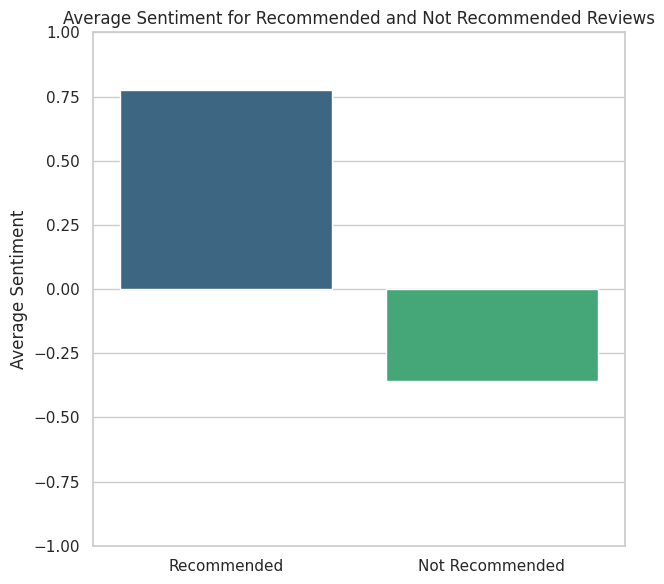

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Plotting t-test results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=['Recommended', 'Not Recommended'], y=[recommended_reviews.mean(), not_recommended_reviews.mean()], palette='viridis')
plt.title('Average Sentiment for Recommended and Not Recommended Reviews')
plt.ylabel('Average Sentiment')
plt.ylim([-1, 1])

plt.tight_layout()
plt.show()


**Summary:**

In this task we focused on analyzing airline reviews from Skytrax, we followed a systematic approach to collect, clean, and analyze data. Here's a summary of the key steps and findings:

Data Collection:

Utilized Python and web scraping techniques to collect review data from Skytrax for British Airways.
Extracted both text reviews and associated star ratings for various aspects such as seat comfort, cabin staff service, etc.
Data Cleaning:

Processed the raw HTML data to create a structured DataFrame using Python and Pandas.
Cleaned the reviews by removing symbols, "verified" or "not verified" labels, and other irrelevant information.
Handled missing values in the ratings columns.
Exploratory Data Analysis (EDA):

Visualized the distribution of ratings for different categories, recommended status, sentiment scores, and topics.
Explored correlations between sentiment scores, ratings, and recommended status.
Hypothesis Testing:

Formulated and tested hypotheses related to sentiment differences between recommended and not recommended reviews and the correlation between sentiment and ratings.

Visualizations.

Discovered insights into customer sentiments, preferences, and potential areas for improvement for British Airways.
Recognized the significance of different aspects such as seat comfort, staff service, and value for money in influencing customer reviews.

Next Steps:

Further analysis, including sentiment analysis of individual aspects, sentiment trends over time, and more in-depth topic modeling.
Utilization of advanced NLP techniques for deeper insights into customer sentiments.


Overall, the analysis provided valuable insights into customer feedback, helping the airline understand areas of strength and potential improvement. The combination of exploratory data analysis, hypothesis testing, and visualizations contributed to a comprehensive understanding of the dataset. The results and visualizations can be presented effectively to stakeholders for informed decision-making.






